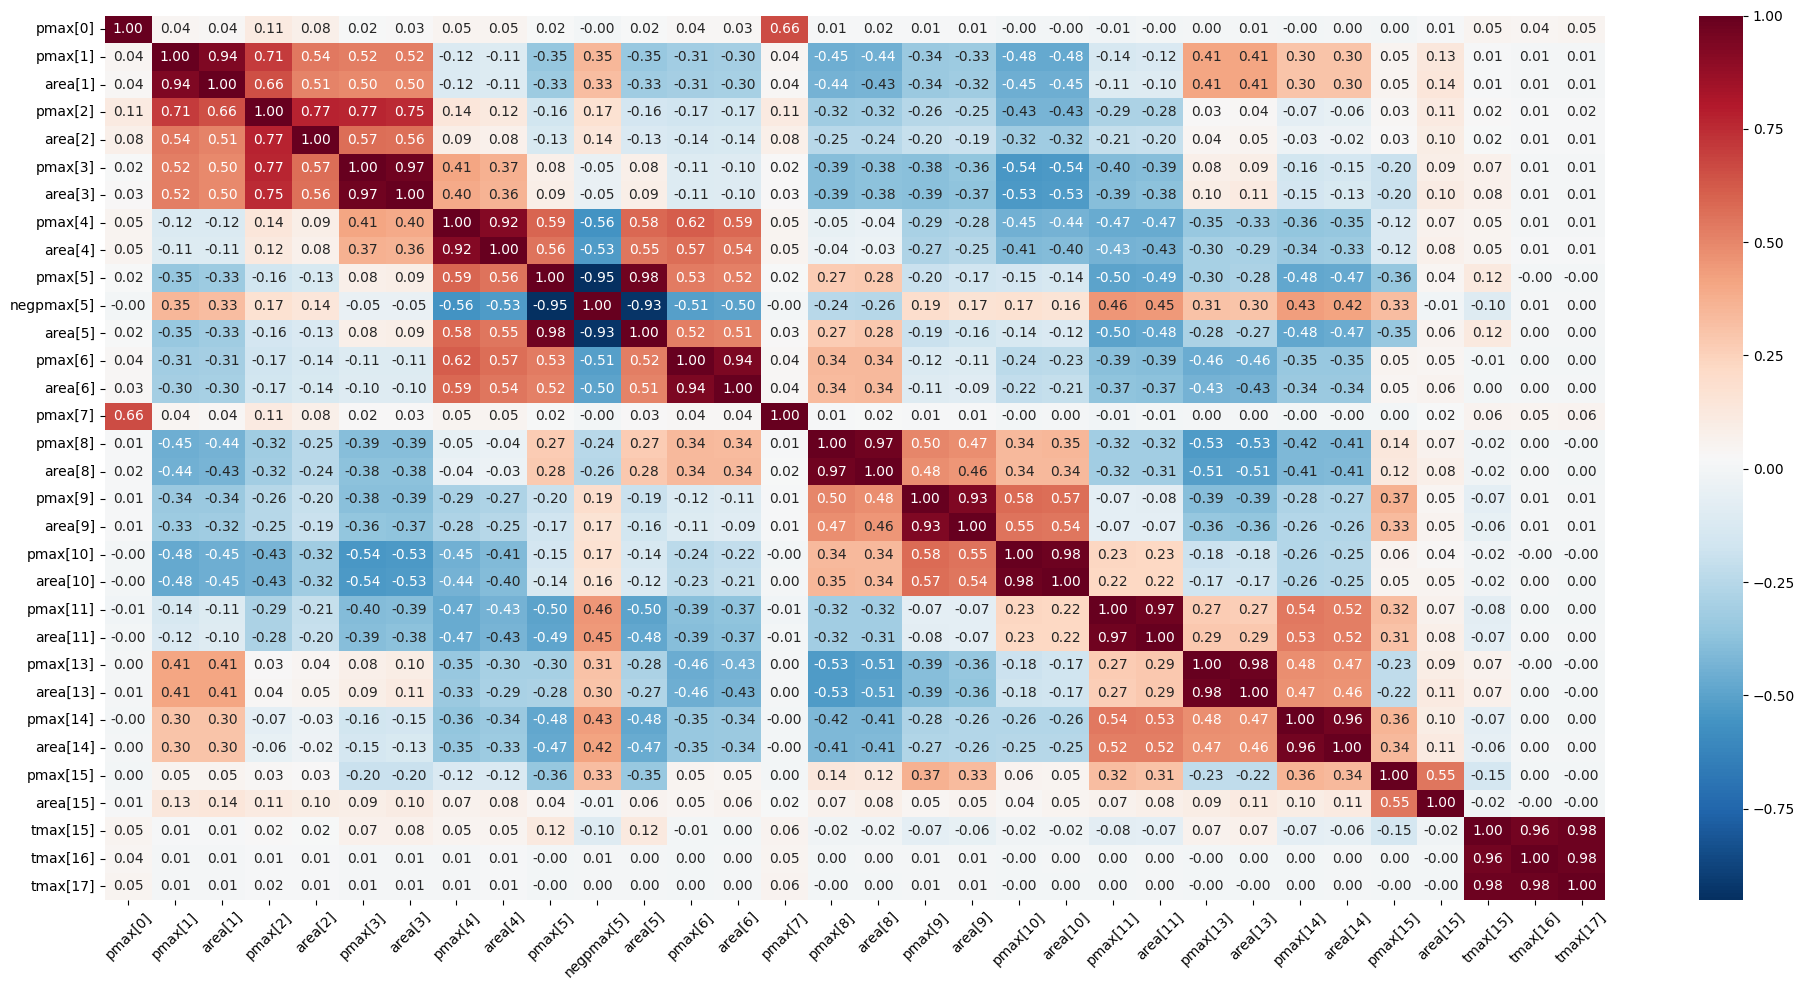

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_dev=pd.read_csv('/kaggle/input/projectdataset/development.csv',sep= ',', low_memory=False)
df_eval = pd.read_csv('/kaggle/input/projectdataset/evaluation.csv',sep= ',', low_memory=False)
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
#plt.rcParams["fig"]
df_dev_filt = df_dev.drop(columns=["x","y"])
final_corr = df_dev_filt.corr("pearson")

correlation_threshold = 0.5
rows_to_keep = (np.abs(final_corr) > correlation_threshold).sum(axis=1) > 1
columns_to_keep = (np.abs(final_corr) > correlation_threshold).sum(axis=0) > 1
filtered_df = final_corr.loc[rows_to_keep,columns_to_keep]
plt.figure()
sns.heatmap(filtered_df, annot=True, fmt=".2f", cmap='RdBu_r')
plt.xticks(rotation=45)
plt.savefig('corr_matrix.png')  # Salva il grafico su file
plt.show()




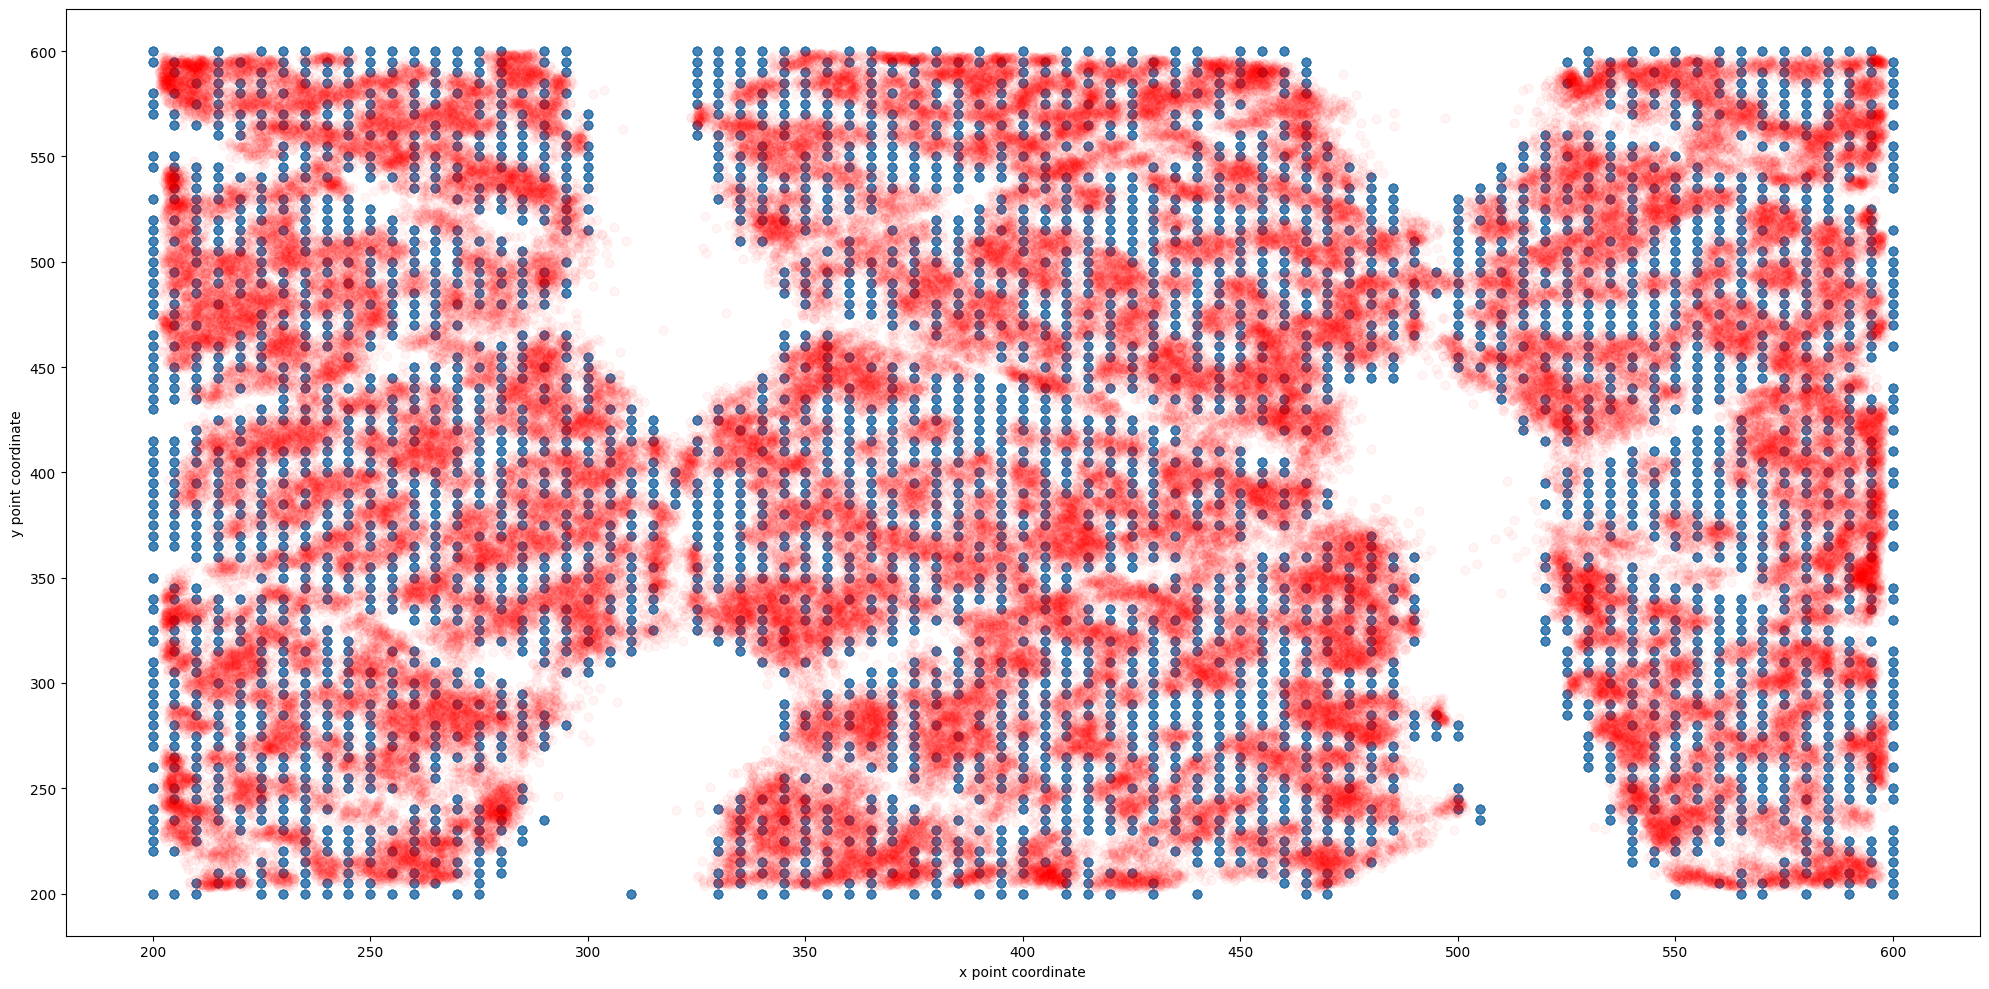

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.scatter(df_dev['x'], df_dev['y'], s=40, alpha=0.01)

df_final=pd.read_csv('/kaggle/input/32600/output_32_600_sqrtfriedman_mse.csv',sep= ',', low_memory=False)
df_final.drop(['Id'],axis=1)
df_final[['x', 'y']] = df_final['Predicted'].str.split('|', expand=True)
df_final['x'] = df_final['x'].astype(float)
df_final['y'] = df_final['y'].astype(float)

plt.rcParams["figure.figsize"] = [20,10]
plt.scatter(df_final['x'], df_final['y'], c='red', s=40, alpha=0.04)
plt.xlabel("x point coordinate")
plt.ylabel("y point coordinate")
plt.savefig('koenisberg.png')  
plt.show()